In [1]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 7.9

In [2]:
Y=np.array([[5,-3],[3,-1],[4,-1],[2,2],[1,3]])
Z=np.array([[1,-2],[1,-1],[1,0],[1,1],[1,2]])
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta=np.matmul(a,b)
print(a)
print(b)
print(beta)

[[0.2 0. ]
 [0.  0.1]]
[[15  0]
 [-9 15]]
[[ 3.   0. ]
 [-0.9  1.5]]


In [3]:
y_hat=np.matmul(Z,beta)
y_hat

array([[ 4.8, -3. ],
       [ 3.9, -1.5],
       [ 3. ,  0. ],
       [ 2.1,  1.5],
       [ 1.2,  3. ]])

In [4]:
error=Y-y_hat
error

array([[ 0.2,  0. ],
       [-0.9,  0.5],
       [ 1. , -1. ],
       [-0.1,  0.5],
       [-0.2,  0. ]])

In [5]:
print(np.matmul(y_hat.T,y_hat)+np.matmul(error.T,error))
print(np.matmul(Y.T,Y))

[[ 55. -15.]
 [-15.  24.]]
[[ 55 -15]
 [-15  24]]


### 7.19

### Một ứng dụng vệ tinh kích thích bởi sự phát triển của một loại pin silver_zino. Bảng 7.5 bao gồm các dữ liệu thất bại được thu thập để nghiên cứu tính hiệu quả của cục pin trong chu kì sống của nó. Sử dụng bộ dữ liệu này để:

### a) Tìm ước lượng hồi quy tuyến tính của ln(Y) trong bộ tập con các biến dự đoán phù hợp

In [6]:
path='/content/T7-5.DAT.txt'
df=pd.DataFrame(np.loadtxt(path))
df.head()

,0,1,2,3,4,5
0,0.375,3.13,60.0,40.0,2.00,101.0
1,1.000,3.13,76.8,30.0,1.99,141.0
2,1.000,3.13,60.0,20.0,2.00,96.0
3,1.000,3.13,60.0,20.0,1.98,125.0
4,1.625,3.13,43.2,10.0,2.01,43.0


In [7]:
df.iloc[:,5]=np.log(df.iloc[:,5])
df.head()

,0,1,2,3,4,5
0,0.375,3.13,60.0,40.0,2.00,4.615121
1,1.000,3.13,76.8,30.0,1.99,4.948760
2,1.000,3.13,60.0,20.0,2.00,4.564348
3,1.000,3.13,60.0,20.0,1.98,4.828314
4,1.625,3.13,43.2,10.0,2.01,3.761200


In [8]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [9]:
#Initialization variables
Y = df.iloc[:,5]
X = df.iloc[:,:5]
k = 5

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [10]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,6)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, [3], 23.002033242783682),
 (2, [3, 1], 19.01410682028911),
 (3, [3, 1, 4], 17.039434517883574),
 (4, [3, 1, 4, 0], 16.523450642393016),
 (5, [3, 1, 4, 0, 2], 16.03179517635035)]

Từ các bước trên, ta sẽ chọn subset gồm 2 feature là 1, 3.

In [11]:
#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,1:2],df.iloc[:,3:4])),axis=1)
Y=df.iloc[:,5].values

In [12]:
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
beta_hat

array([ 2.75647514, -0.3218242 ,  0.11382396])

Từ đây, phương trình hồi quy tuyến tính từ bộ tập con các biến phù hợp là: $ln(Y)=2.756 -0.322z_1+0.114z_3$

Từ đây, ta có dự đoán cần tìm là.

In [13]:
y_hat=np.matmul(Z,beta_hat).reshape(-1,1)
y_hat

array([[6.30212399],
       [5.16388435],
       [4.0256447 ],
       [4.0256447 ],
       [2.88740506],
       [4.0256447 ],
       [4.0256447 ],
       [2.28559381],
       [2.28559381],
       [4.5620731 ],
       [3.42383346],
       [2.28559381],
       [3.49243454],
       [3.49243454],
       [5.76891384],
       [2.3541949 ],
       [5.76891384],
       [4.63067419],
       [5.16388435],
       [4.0256447 ]])

### b) Vẽ sai số từ model đã fit ở phần a để kiểm tra giả định về tính chuẩn.

Sai số residuals tìm được là: 

In [14]:
residuals=Y.reshape(-1,1)-y_hat
residuals

array([[-1.68700348],
       [-0.21512446],
       [ 0.53870349],
       [ 0.80266903],
       [ 0.87379506],
       [-1.25305598],
       [ 1.21079726],
       [ 0.01699128],
       [-1.18698152],
       [ 1.39376427],
       [ 0.38282903],
       [-1.59244663],
       [ 0.8382988 ],
       [ 0.86427428],
       [-0.69374002],
       [-1.25558261],
       [-0.39363543],
       [-0.34021475],
       [ 0.58550864],
       [ 1.11015373]])

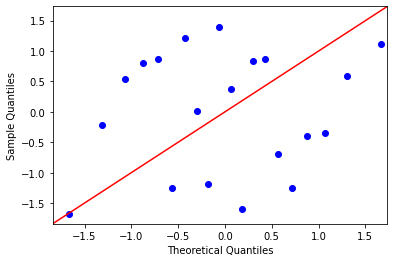

In [15]:
import pylab
import statsmodels.api as sm
sm.qqplot(residuals,line='45')
plt.show()

Ta nhận thấy đồ thị qq plot cho sai số residuals thì các điểm residuals không nằm fit trên đường thẳng. Nên ta không thể kết luận residuals tuân theo phân phối chuẩn.

### 7.21

### Xét bảng dữ liệu về ô nhiễm không khí ở bảng 1.5. Cho $Y_1= NO_2$ và $Y_2=O_3$ là 2 responses theo 2 biến là $Z_1$ = gió, $Z_2$ là bức xạ mặt trời.

### (a) Thực hiện phân tích hồi quy sử dụng mối Y_1
#(i) Đề xuất và fit model hồi quy tuyến tính phù hợp nhất

#(ii) Phân tích residuals

#(iii) Xây dựng khoảng tin cậy $95\%$ cho $NO_2$ ứng với $z_1=10, z_2=80$

In [16]:
from scipy import stats 
def prediction_interval(X, y, z0, beta, alpha, name_y):
    z0 = np.insert(z0, 0, 1, axis=0)
    x = z0.dot(beta)
    
    n, r = X.shape
    
    t = stats.t.ppf(1-alpha/2, n-r-1)
    z = np.concatenate([np.ones([X.shape[0],1]), X], axis=1)
    zz = (z.T).dot(z)
    y_hat = z.dot(beta)
    epsilon = y - y_hat
    s2 = (epsilon.dot(epsilon))/(n-r-1)
    
    c1 = t*np.sqrt(s2*(z0.dot(np.linalg.inv(zz).dot(z0))))
    c2 = t*np.sqrt(s2*(1+z0.dot(np.linalg.inv(zz).dot(z0))))
    
    print(">> {}% confidence interval for mean {} at {} is : ({}, {})".format((1-alpha)*100, name_y, z0, x-c1, x+c1))
    print("\n>> {}% prediction interval for {} with conditions z_0 {} is : ({}, {})".format((1-alpha)*100, name_y, z0, x-c2, x+c2))

In [17]:
path='/content/T1-5.dat.txt'
df=pd.DataFrame(np.loadtxt(path))
df.head()

,0,1,2,3,4,5,6
0,8.0,98.0,7.0,2.0,12.0,8.0,2.0
1,7.0,107.0,4.0,3.0,9.0,5.0,3.0
2,7.0,103.0,4.0,3.0,5.0,6.0,3.0
3,10.0,88.0,5.0,2.0,8.0,15.0,4.0
4,6.0,91.0,4.0,2.0,8.0,10.0,3.0


In [18]:
#Initialization variables
Y = df.iloc[:,4]
X = df.iloc[:,:2]
k = 2

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [19]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,3)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, [1], 459.6644830411526), (2, [1, 0], 455.1355817151742)]

Ta nhận thấy là RSS không quá khác biệt nên ta sẽ lấy cả hai biến.

In [20]:
#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,0:2])),axis=1)
Y=df.iloc[:,4].values

In [21]:
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
beta_hat

array([10.11454142, -0.21129082,  0.02054992])

Từ đây, phương trình hồi quy tuyến tính từ bộ tập con các biến phù hợp là: $ln(Y)=10.115 -0.211z_0+0.0205z_1$

In [22]:
y_hat=np.matmul(Z,beta_hat).reshape(-1,1)
residuals=Y.reshape(-1,1)-y_hat
residuals

array([[ 1.56189246],
       [-1.83434768],
       [-5.75214798],
       [-1.81002666],
       [-2.7168397 ],
       [ 1.72629186],
       [ 2.06088222],
       [10.46231806],
       [ 0.67940044],
       [ 3.26058991],
       [-0.3058412 ],
       [ 1.2831603 ],
       [ 7.88489969],
       [ 1.55987199],
       [-1.48122786],
       [-0.7952683 ],
       [-2.98600919],
       [ 6.11674043],
       [ 3.41023095],
       [-0.6308689 ],
       [ 4.72427139],
       [-3.02131748],
       [ 2.93179111],
       [-4.67458509],
       [-0.5524403 ],
       [-3.15040859],
       [ 0.55030933],
       [-3.04765897],
       [-1.12089187],
       [-1.76198049],
       [ 0.11674043],
       [ 2.29589819],
       [-2.04448374],
       [-0.3880409 ],
       [-2.72088064],
       [-1.17095852],
       [-4.82538089],
       [ 2.17461911],
       [-1.25894978],
       [-2.25894978],
       [ 0.75580858],
       [-3.24621189]])

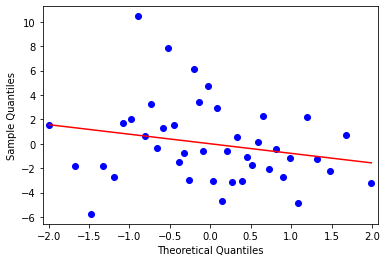

In [23]:
sm.qqplot(residuals,line='r')
plt.show()

Có vẻ như residuals không tuân theo phân phối chuẩn.

In [24]:
z0=np.array([10,80]).T
beta=beta_hat
alpha=0.05
name_y='y_1'
prediction_interval(X, Y, z0, beta, alpha, name_y)

>> 95.0% confidence interval for mean y_1 at [ 1 10 80] is : (7.557589248117703, 11.733665278263036)

>> 95.0% prediction interval for y_1 with conditions z_0 [ 1 10 80] is : (2.4271988553043835, 16.864055671076358)


### (b) Thực hiện phân tích hồi quy nhiều bién sử dụng cả 2 responses $Y_1$, $Y_2$.

#(i) Đề xuất và vẽ model hồi quy tuyến tính phù hợp

#(ii) Phân tích residuals

#(iii) Xây dựng $95\%$ hình ellipse dự đoán cho cả $NO_2, O_3$ cho $z_1=10, z_2=80$. So sánh ellipse này với khoảng đự đoán ở phần a. Bình luận.

In [25]:
#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,0:2])),axis=1)
Y=df.iloc[:,4:6].values

a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
beta_hat



array([[10.11454142,  8.27619196],
       [-0.21129082, -0.78682381],
       [ 0.02054992,  0.09518035]])

In [26]:
y_hat=np.matmul(Z,beta_hat)
residuals=Y-y_hat
residuals

array([[ 1.56189246, -3.30927553],
       [-1.83434768, -7.95272247],
       [-5.75214798, -6.57200108],
       [-1.81002666,  6.21617556],
       [-2.7168397 , -2.21666072],
       [ 1.72629186,  1.45216725],
       [ 2.06088222,  5.81007314],
       [10.46231806,  2.80494208],
       [ 0.67940044,  0.42678622],
       [ 3.26058991,  0.92685628],
       [-0.3058412 , -7.31305377],
       [ 1.2831603 , -5.21666072],
       [ 7.88489969,  0.37858969],
       [ 1.55987199, -0.07057819],
       [-1.48122786,  2.73906112],
       [-0.7952683 ,  1.47633557],
       [-2.98600919, -2.21530789],
       [ 6.11674043, -4.73940615],
       [ 3.41023095, -5.57186095],
       [-0.6308689 , -2.76222165],
       [ 4.72427139, -2.30913541],
       [-3.02131748, -3.57064825],
       [ 2.93179111,  1.40397072],
       [-4.67458509, -5.19748333],
       [-0.5524403 , 11.54478206],
       [-3.15040859, -3.97675067],
       [ 0.55030933,  0.0206838 ],
       [-3.04765897,  0.49915107],
       [-1.12089187,

In [27]:
z0=np.array([[1,10,80]]).T
sigma=1/Y.shape[0]*np.matmul((Y-np.matmul(Z,beta_hat)).T,Y-np.matmul(Z,beta_hat))
sigma

array([[10.83656147,  1.97415605],
       [ 1.97415605, 25.66586379]])

In [28]:
beta_hat_z_0=np.matmul(beta_hat.T,z0)
beta_hat_z_0

array([[9.64562726],
       [8.02238166]])

In [29]:
from matplotlib.patches import Ellipse, Rectangle
def get_cov_ellipse(cov, centre, nstd, eig = False, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    if eig:
        return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs), eigvals, eigvecs
    else: 
        return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)
    
def simultaneous_ci_2d(IC_1, IC_2, **kwargs):
    height = IC_2[1]-IC_2[0]
    width = IC_1[1]-IC_1[0]
    point = [IC_1[0],IC_2[0]]
    return Rectangle(point, width, height, **kwargs)

In [30]:
n=Y.shape[0]
r=2
m=2
alpha=0.05
f = stats.f.ppf(q=1-alpha, dfn=m, dfd=n-r-m)
value=np.matmul(z0.T,np.matmul(np.linalg.inv(np.matmul(Z.T,Z)),z0))
critical_value=(1+value)*m*(n-r-1)/(n-r-m)*f
critical_value

array([[7.26861181]])

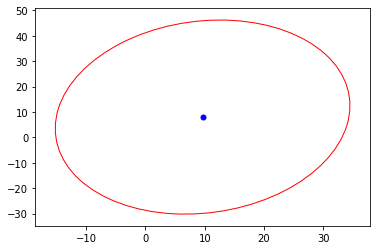

In [31]:
#(2.4271988553043835, 16.864055671076358)
fig, ax = plt.subplots()
e = get_cov_ellipse(n/(n-r-1)*sigma, beta_hat_z_0, critical_value.item(), edgecolor='red', facecolor='None')
ax.scatter(beta_hat_z_0[0], beta_hat_z_0[1], c='blue', s=25)
ax.add_patch(e)

Nhìn vào hình ellipse trên, ta thấy khoảng dự đoán (2.4271988553043835, 16.864055671076358) ở câu a cũng nằm trong ellipse trên.

### 7.26

Phép đo về tính chất của sợi bột giấy và giấy làm từ chúng được chứa trong bảng 7.7. Có $n=62$ quan trắc của tính chất sợi bột giấy, $z_1$ là chiều dài đại số của sợi, $z_2$ là mảnh sợi dài, $z_3$ là mảnh sợi vừa, $z_4$ là sức kéo không nhịp và tính chất của giấy. $y_1$ là chiều dài breaking, $y_2$ là mođun đàn hồi, $y_3$ là áp lực ở failure, $y_4$ là sức bung.

### (a) Thực hiện phân tích hồi quy sử dụng mỗi response variables $Y_1, Y_2, Y_3, Y_4$.

#(i) Đề xuất và fit model hồi quy tuyến tính phù hợp

#(ii) Phân tích residuals. Kiểm tra các điểm ngoại lai hay quan trắc có leverage cao.

#(iii) Xây dựng khoảng dự đoán $95\%$ cho SF($Y_3$) cho $z_1=.330, z_2=45.500, z_3=20.375, z_4=1.010$



### Với $Y_1$

In [32]:
path='/content/T7-7.dat.txt'
df=pd.DataFrame(np.loadtxt(path))
df.head()

,0,1,2,3,4,5,6,7
0,21.312,7.039,5.326,0.932,-0.030,35.239,36.991,1.057
1,21.206,6.979,5.237,0.871,0.015,35.713,36.851,1.064
2,20.709,6.779,5.060,0.742,0.025,39.220,30.586,1.053
3,19.542,6.601,4.479,0.513,0.030,39.756,21.072,1.050
4,20.449,6.795,4.912,0.577,-0.070,32.991,36.570,1.049


In [33]:
#Initialization variables
Y = df.iloc[:,0]
X = df.iloc[:,4:]
k = 4

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,5)])

#Theo stepwise, ta sẽ chọn 3 ẩn 5,6,7

#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,5:])),axis=1)
Y=df.iloc[:,0].values

#Fit the model
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
print('beta_hat: ',beta_hat)



Forward stepwise subset selection
Number of features | Features | RSS


[(1, [7], 164.44266543562688),
 (2, [7, 6], 150.50761700883078),
 (3, [7, 6, 5], 133.86611977637446),
 (4, [7, 6, 5, 4], 127.90660997477761)]

beta_hat:  [-7.01168077e+01  5.93005155e-02  5.55210176e-02  8.25302467e+01]


Từ đây, model fit sẽ là $Y_1=-70.1+0.0593z_2+0.0552z_3+82.53z_4$

In [34]:
y_hat=np.matmul(Z,beta_hat)
residuals=Y-y_hat
Q1 = pd.DataFrame(residuals).quantile(0.25).item()
Q3 = pd.DataFrame(residuals).quantile(0.75).item()
IQR = Q3 - Q1
print(np.where((residuals < (Q1 - 1.5 * IQR)) |(residuals > (Q3 + 1.5 * IQR))))
#Do đó, ta có các quan trắc 50,51,55 có residuals làm điểm ngoại lai

H=np.matmul(Z,np.linalg.inv(np.matmul(Z.T,Z)))
H=np.matmul(H,Z.T)
for i in range(H.shape[0]):
  if H[i][i]>=0.1:
    print('Observation {} has high leverage'.format(i))

(array([50, 51, 55]),)
Observation 17 has high leverage
Observation 56 has high leverage
Observation 57 has high leverage
Observation 58 has high leverage
Observation 59 has high leverage
Observation 60 has high leverage
Observation 61 has high leverage


### Với $Y_2$

In [35]:
#Initialization variables
Y = df.iloc[:,1]
X = df.iloc[:,4:]
k = 4

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,5)])

#Theo stepwise, ta sẽ chọn 2 ẩn 4 và 7

#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,4:5],df.iloc[:,7:])),axis=1)
Y=df.iloc[:,1].values

#Fit the model
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
print('beta_hat: ',beta_hat)


Forward stepwise subset selection
Number of features | Features | RSS


[(1, [7], 8.711282414469641),
 (2, [7, 4], 7.352405827890526),
 (3, [7, 4, 6], 6.8999708644712525),
 (4, [7, 4, 6, 5], 6.717485571301179)]

beta_hat:  [-21.59804537  -0.96396551  27.03701768]


Từ đây, model fit sẽ là $Y_2=-21.6-0.964z_1+27.04z_4$

In [36]:
y_hat=np.matmul(Z,beta_hat)
residuals=Y-y_hat
Q1 = pd.DataFrame(residuals).quantile(0.25).item()
Q3 = pd.DataFrame(residuals).quantile(0.75).item()
IQR = Q3 - Q1
print(np.where((residuals < (Q1 - 1.5 * IQR)) |(residuals > (Q3 + 1.5 * IQR))))
#Do đó, ta có các quan trắc 32 có residuals làm điểm ngoại lai

H=np.matmul(Z,np.linalg.inv(np.matmul(Z.T,Z)))
H=np.matmul(H,Z.T)
for i in range(H.shape[0]):
  if H[i][i]>=0.1:
    print('Observation {} has high leverage'.format(i))

(array([32]),)
Observation 17 has high leverage
Observation 55 has high leverage
Observation 56 has high leverage
Observation 57 has high leverage
Observation 58 has high leverage
Observation 59 has high leverage


### Với $Y_3$

In [37]:
#Initialization variables
Y = df.iloc[:,2]
X = df.iloc[:,4:]
k = 4

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,5)])

#Từ stepwise ta sẽ chọn 3 ẩn là 5, 6, 7

#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,5:])),axis=1)
Y=df.iloc[:,2].values

#Fit the model
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat_3=np.matmul(a,b)
print('beta_hat: ',beta_hat_3)

Forward stepwise subset selection
Number of features | Features | RSS


[(1, [7], 32.83525706078822),
 (2, [7, 6], 29.151273235206947),
 (3, [7, 6, 5], 25.226221653728466),
 (4, [7, 6, 5, 4], 23.87522258737808)]

beta_hat:  [-4.38040557e+01  2.87995004e-02  2.82155567e-02  4.45860407e+01]


Từ đây, model fit sẽ là $Y_3=-43.8-0.0288z_2+0.0282z_3+44.6z_4$

In [38]:
y_hat=np.matmul(Z,beta_hat_3)
residuals=Y-y_hat
Q1 = pd.DataFrame(residuals).quantile(0.25).item()
Q3 = pd.DataFrame(residuals).quantile(0.75).item()
IQR = Q3 - Q1
print(np.where((residuals < (Q1 - 1.5 * IQR)) |(residuals > (Q3 + 1.5 * IQR))))
#Do đó, ta có các quan trắc 51, 55 có residuals làm điểm ngoại lai

H=np.matmul(Z,np.linalg.inv(np.matmul(Z.T,Z)))
H=np.matmul(H,Z.T)
for i in range(H.shape[0]):
  if H[i][i]>=0.1:
    print('Observation {} has high leverage'.format(i))

(array([51, 55]),)
Observation 17 has high leverage
Observation 56 has high leverage
Observation 57 has high leverage
Observation 58 has high leverage
Observation 59 has high leverage
Observation 60 has high leverage
Observation 61 has high leverage


### Với $Y_4$

In [39]:
#Initialization variables
Y = df.iloc[:,3]
X = df.iloc[:,4:]
k = 4

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,5)])

#Từ đây, ta sẽ chọn 3 ẩn là 5, 6, 7

#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,5:])),axis=1)
Y=df.iloc[:,3].values

#Fit the model
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
print('beta_hat: ',beta_hat)

Forward stepwise subset selection
Number of features | Features | RSS


[(1, [7], 9.920642931854298),
 (2, [7, 5], 8.10942168246493),
 (3, [7, 5, 6], 7.120748790585315),
 (4, [7, 5, 6, 4], 6.935608678486385)]

beta_hat:  [-1.70020208e+01  2.24180510e-02  1.20301686e-02  1.57712183e+01]


Từ đây, model fit sẽ là $Y_4=-17+0.0242z_2+0.012z_3+15.77z_4$

In [40]:
y_hat=np.matmul(Z,beta_hat)
residuals=Y-y_hat
Q1 = pd.DataFrame(residuals).quantile(0.25).item()
Q3 = pd.DataFrame(residuals).quantile(0.75).item()
IQR = Q3 - Q1
print(np.where((residuals < (Q1 - 1.5 * IQR)) |(residuals > (Q3 + 1.5 * IQR))))
#Do đó, ta có các quan trắc 50,51, 55 có residuals làm điểm ngoại lai

H=np.matmul(Z,np.linalg.inv(np.matmul(Z.T,Z)))
H=np.matmul(H,Z.T)
for i in range(H.shape[0]):
  if H[i][i]>=0.1:
    print('Observation {} has high leverage'.format(i))

(array([50, 51, 55]),)
Observation 17 has high leverage
Observation 56 has high leverage
Observation 57 has high leverage
Observation 58 has high leverage
Observation 59 has high leverage
Observation 60 has high leverage
Observation 61 has high leverage


### Xây dựng khoảng dự đoán $95\%$ cho SF($Y_3$) cho $z_1=.330, z_2=45.500, z_3=20.375, z_4=1.010$

In [41]:
z0=np.array([45.5,20.375, 1.010]).T
beta=beta_hat_3
alpha=0.05
name_y='y_3'
prediction_interval(df.iloc[:,5:],df.iloc[:,2], z0, beta, alpha, name_y)

>> 95.0% confidence interval for mean y_3 at [ 1.    45.5   20.375  1.01 ] is : (2.3487551129498794, 3.877474151896462)

>> 95.0% prediction interval for y_3 with conditions z_0 [ 1.    45.5   20.375  1.01 ] is : (1.587672350571919, 4.638556914274423)


### (b) Xây dựng mô hình hồi quy tuyến tính nhiều chiều sử dụng cả 4 response $Y_1, Y_2, Y_3, Y_4$ và 4 biến độc lập $Z_1, Z_2, Z_3,Z_4$

#(i) Đề xuất và fit mô hình hồi quy tuyến tính phù hợp. Tính ma trận hệ số ước lượng $\boldsymbol{\hat{\beta}}$ và ma trận hiệp phương sai lỗi ước lượng $\boldsymbol{\hat{\Sigma}}$.

#(ii) Phân tích residuals. Kiểm tra điểm ngoại lai

#(iii) Xây dựng khoảng dự đoán đồng thời $95\%$ cho từng responses với cài đặt giống với các biến đã chọn ở câu a. So sánh khoảng dự đoán đồng thời với khoảng dự đoán ở câu a.

In [42]:
#Initialization variables
Y = df.iloc[:,0:4]
X = df.iloc[:,4:]
k = 4

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], RSS_list[i]) for i in range(1,5)])

#Từ đây, ta sẽ chọn 3 ẩn 5, 6, 7 vào model của mình.

#Construct Z, Y
Z=np.concatenate(((np.ones((df.shape[0],1)),df.iloc[:,5:])),axis=1)
Y=df.iloc[:,:4].values

#Fit the model
a=np.linalg.inv(np.matmul(Z.T,Z))
b=np.matmul(Z.T,Y)
beta_hat=np.matmul(a,b)
print('beta_hat: ',beta_hat)

Forward stepwise subset selection
Number of features | Features | RSS


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

[(1, [7], 53.97746196068476),
 (2, [7, 6], 49.218233979163166),
 (3, [7, 6, 5], 43.44748096597761),
 (4, [7, 6, 5, 4], 41.35873170298585)]

beta_hat:  [[-7.01168077e+01 -2.24521873e+01 -4.38040557e+01 -1.70020208e+01]
 [ 5.93005155e-02 -5.40280813e-03  2.87995004e-02  2.24180510e-02]
 [ 5.55210176e-02  1.06772777e-02  2.82155567e-02  1.20301686e-02]
 [ 8.25302467e+01  2.77880039e+01  4.45860407e+01  1.57712183e+01]]


In [43]:
#Calculate estimated error covariance matrix
sigma=1/Y.shape[0]*np.matmul((Y-np.matmul(Z,beta_hat)).T,Y-np.matmul(Z,beta_hat))
sigma

array([[2.15913096, 0.40238408, 0.88597429, 0.48665889],
       [0.40238408, 0.12220699, 0.19464583, 0.08855109],
       [0.88597429, 0.19464583, 0.40687454, 0.20086689],
       [0.48665889, 0.08855109, 0.20086689, 0.11485079]])

In [44]:
y_hat=np.matmul(Z,beta_hat)
residuals=Y-y_hat
Q1 = pd.DataFrame(residuals).quantile(0.25)
Q3 = pd.DataFrame(residuals).quantile(0.75)
IQR = Q3 - Q1
index=0
for row in residuals:
  for i in range(4):
    if (row[i] < (Q1-1.5*IQR)[i]) | (row[i]> (Q3+1.5*IQR)[i]):
      print('Observation {} could be a outlier'.format(index))
      break
  index+=1
#Do đó, ta có các quan trắc 50,51, 55, 60 có residuals làm điểm ngoại lai

Observation 50 could be a outlier
Observation 51 could be a outlier
Observation 55 could be a outlier
Observation 60 could be a outlier


In [45]:
#Construct simultaneous 95% prediction interval
z0=np.array([1,45.5,20.375, 1.010]).T
n=Y.shape[0]
r=3
m=4
alpha=0.05
f = stats.f.ppf(q=1-alpha, dfn=m, dfd=n-r-m)
value=m*(n-r-1)/(n-r-m)*f
value_1=np.matmul(z0.T,np.linalg.inv(np.matmul(Z.T,Z)))
value_1=np.matmul(value_1,z0)
for i in range(1,5):
  lowerbound=np.matmul(z0.T,beta_hat[:,i-1])-np.sqrt(value)*np.sqrt((1+value_1)*(n/(n-r-1)*sigma[i-1][i-1]))
  upperbound=np.matmul(z0.T,beta_hat[:,i-1])+np.sqrt(value)*np.sqrt((1+value_1)*((n/(n-r-1)*sigma[i-1][i-1])))
  print('95% simultaneous prediction interval for Y_0{}: [{}, {}]'.format(i,lowerbound,upperbound))

95% simultaneous prediction interval for Y_01: [11.322294700006552, 22.814016734022488]
95% simultaneous prediction interval for Y_02: [4.218433633879856, 6.952403043778416]
95% simultaneous prediction interval for Y_03: [0.6188307349279873, 5.607398529906158]
95% simultaneous prediction interval for Y_04: [-1.133157938351057, 1.5172492903930488]


### Khoảng dự đoán $95\%$ ở câu a (iii) thu được là $(1.587672350571919, 4.638556914274423)$. 
### Từ đây ta nhận thấy là khoảng dự đoán $95\%$ đồng thời rộng hơn so với khoảng dự đoán riêng lẻ với cùng $\alpha$.